In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import plotly.express as px
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
#from datetime import datetime 
import operator
plt.style.use('seaborn')
%matplotlib inline

In [ ]:
'''
from google.colab import files
uploaded=files.upload()
'''

'\nfrom google.colab import files\nuploaded=files.upload()\n'

In [ ]:
'''
confirmed_cases = pd.read_csv('time_series_covid_19_confirmed.csv')
deaths_reported = pd.read_csv('time_series_covid_19_deaths.csv')
recovered_cases = pd.read_csv('time_series_covid_19_recovered.csv')
'''

confirmed_cases=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_reported=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_cases=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [ ]:
confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,220,235,235,235,235,246,251,251,251,251,251,251,299,441,443,458,463,479,483,484,484,484,485,499,499,513,513,514,611,632,639,659,661,662,671,683,688,693,698,698
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,70,85,106,122,128,130,167,184,197,209,212,222,233,249,256,278,283,310,323,354,399,419,453,469,482,484,496,524,560,591,632,705,728,844,885,902,909,919,922,941
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,34,34,78,78,87,87,87,87,87,87,106,106,106,132,132,132,132,141,141,141,141,162,162,163,176,176,176,197,197,210,210,247,247
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,801,907,1118,1322,1524,1729,1936,2140,2350,2551,2738,2929,3100,3266,3424,3563,3686,3807,3930,4013,4100,4191,4289,4370,4453,4529,4609,4690,4763,4834,4902,4971,5035,5097,5160,5221,5279,5338,5399,5457


In [ ]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/12/20', '6/13/20', '6/14/20', '6/15/20', '6/16/20', '6/17/20',
       '6/18/20', '6/19/20', '6/20/20', '6/21/20'],
      dtype='object', length=156)

In [ ]:
india_confirmed_cases=confirmed_cases.loc[confirmed_cases['Country/Region']=='India']
india_confirmed_cases.loc[:,cols[4]:cols[-1]]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
131,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,78055,81997,85784,90648,95698,100328,106475,112028,118226,124794,131423,138536,144950,150793,158086,165386,173491,181827,190609,198370,207191,216824,226713,236184,246622,257486,265928,276146,286605,297535,308993,320922,332424,343091,354065,366946,380532,395048,410451,425282


In [ ]:
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]


In [ ]:
dates = confirmed.keys()
print(dates)
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 
india_cases=[]

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    india_cases.append(india_confirmed_cases[i].sum())
india_cases

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/12/20', '6/13/20', '6/14/20', '6/15/20', '6/16/20', '6/17/20',
       '6/18/20', '6/19/20', '6/20/20', '6/21/20'],
      dtype='object', length=152)


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292,
 78055,
 81997,
 85784,
 90648,
 95698,
 100328,
 106475,
 112028,
 118226,
 124794,
 131423,
 138536,
 144950,
 150793,
 158086,
 165386,
 173491,
 181827,
 190609,
 198370,
 207191,
 216824,
 226713,
 236184,
 246622,
 257486,
 265928,
 276146,
 286605,
 297535,
 308993,
 320922,
 332424,
 343091,
 354065,
 366946,
 380532,
 395048,
 410451,
 

In [ ]:
print(confirmed_sum)
print(recovered_sum)
print(death_sum)

8952428
4434628
468331


In [ ]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [ ]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
days_in_future = 30
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-20]

In [ ]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]
print("Latest confirmed")
print(latest_confirmed)
print()
print("Latest deaths")
print(latest_deaths)
print()
print("Latest recoveries")
print(latest_recoveries)

Latest confirmed
0      28833
1       1962
2      11771
3        855
4        183
       ...  
261      698
262      941
263      247
264     5457
265        4
Name: 6/21/20, Length: 266, dtype: int64

Latest deaths
0      581
1       44
2      845
3       52
4        9
      ... 
261     12
262    256
263      5
264     52
265      0
Name: 6/21/20, Length: 266, dtype: int64

Latest recoveries
0      8764
1      1134
2      8422
3       792
4        77
       ... 
248     203
249     347
250     159
251    3995
252       2
Name: 6/21/20, Length: 253, dtype: int64


In [ ]:
unique_countries =  list(confirmed_cases['Country/Region'].unique())
random.sample(unique_countries,15)

['Guinea-Bissau',
 'Qatar',
 'Nicaragua',
 'Guatemala',
 'Mali',
 'Malaysia',
 'Namibia',
 'US',
 'Cuba',
 'Armenia',
 'Saint Kitts and Nevis',
 'Tunisia',
 'Peru',
 'Japan',
 'Luxembourg']

In [ ]:
color_arr = px.colors.qualitative.Dark24
def draw_plot(ts_array, ts_label, title, colors, mode_size, line_size, x_axis_title, y_axis_title, tickangle, yaxis_type,additional_annotation):
    fig =go.Figure()
    for index,ts in enumerate(ts_array):
        fig.add_trace(go.Scatter(x=ts.index,
                                 y=ts.values,
                                name=ts_label[index],
                                line=dict(color=colors[index],width=line_size[index]),connectgaps=True,))
    
    x_axis_dict = dict(showline=True,
                      showgrid=True,
                      showticklabels=True,
                      linecolor='rgb(204,204,204)',
                      linewidth = 2,
                      ticks= 'outside',
                      tickfont=dict(family='Arial',size=12,color='rgb(82,82,82)',))
    if x_axis_title:
        x_axis_dict['title']=x_axis_title
        
    if tickangle>0:
        x_axis_dict['tickangle']= tickangle
    
    y_axis_dict =  dict(showline=True,
                      showgrid=True,
                      showticklabels=True,
                      linecolor='rgb(204,204,204)',
                      linewidth = 2,)
    if yaxis_type!='':
        y_axis_dict['type']=yaxis_type
        
    if y_axis_title:
        y_axis_dict['title']=y_axis_title
        
    fig.update_layout(xaxis=x_axis_dict,
                     yaxis=y_axis_dict,
                     autosize=True,
                     margin=dict(autoexpand=True,l=100,r=20,t=110),
                     showlegend=True,)
    annotations=[]
    annotations.append(dict(xref='paper',yref='paper',x=0.0,y=1.05,xanchor='left',yanchor='bottom',
                          text=title,
                          font=dict(family='Arial',size=16,color='rgb(37,37,37)'),showarrow=False))
    
    if len(additional_annotation)>0:
        annotations.append(additional_annotation)
    
    fig.update_layout(annotations=annotations)
    return fig

In [ ]:
country_cases_file_link="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"
confirmed_cases_file_link ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
death_cases_file_link ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovery_case_file_link ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

country_df = pd.read_csv(country_cases_file_link)
confirmed_df= pd.read_csv(confirmed_cases_file_link)
death_df = pd.read_csv(death_cases_file_link)
recovery_df = pd.read_csv(recovery_case_file_link)


global_data = country_df.copy().drop(['Lat','Long_','Last_Update','Country_Region'],axis=1)
global_summary= pd.DataFrame(global_data.sum()).transpose()
global_summary.style

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID
0,8963439.000000,468485.000000,4440417.000000,3979994.000000,33365.237396,0.000000,0.000000,643.734967,97529.000000


In [ ]:
confirmed_ts = confirmed_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis=1)
confirmed_ts_summary= confirmed_ts.sum()

fig = go.Figure(data=go.Scatter(x=confirmed_ts_summary.index,y=confirmed_ts_summary.values, mode='lines+markers'))
fig.update_layout(title='Total Confirmed Coronavirus Cases(globaly)',
                 yaxis_title="Confirmed cases",xaxis_tickangle=315)
fig.show()

In [ ]:
confirmed_agg_ts  =confirmed_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis=1).sum()
death_agg_ts  =death_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis=1).sum()
recovery_agg_ts  =recovery_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis=1).sum()

active_agg_ts=pd.Series(
    data=np.array(
    [x1 - x2 - x3 for (x1,x2,x3) in zip(confirmed_agg_ts.values,death_agg_ts.values,recovery_agg_ts.values)]),
    index=confirmed_agg_ts.index)

In [ ]:
ts_array=[confirmed_agg_ts,active_agg_ts,recovery_agg_ts,death_agg_ts]
labels=['Confirmed','Active','Recovery','Death']
colors=[color_arr[5],color_arr[0],color_arr[2],color_arr[3]]
mode_size=[8,8,12,8]
line_size=[2,2,4,2]

fig_2= draw_plot(ts_array=ts_array,
                ts_label=labels,
                title='Covid-19 case status(22nd Jan- 12th May)',
                colors=colors,mode_size=mode_size,
                line_size=line_size,
                x_axis_title='Date',
                y_axis_title="Case count",
                tickangle=315,
                yaxis_type='',additional_annotation=[])
fig_2.show()


In [ ]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()


print('Confirmed Cases by Countries/Regions:')
for i in range(20):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 2279879 cases
Brazil: 1083341 cases
Russia: 583879 cases
India: 425282 cases
United Kingdom: 305803 cases
Peru: 251338 cases
Spain: 246272 cases
Chile: 242355 cases
Italy: 238499 cases
Iran: 204952 cases
France: 197008 cases
Germany: 191272 cases
Turkey: 187685 cases
Pakistan: 181088 cases
Mexico: 180545 cases
Saudi Arabia: 157612 cases
Bangladesh: 112306 cases
Canada: 103078 cases
South Africa: 97302 cases
Qatar: 87369 cases


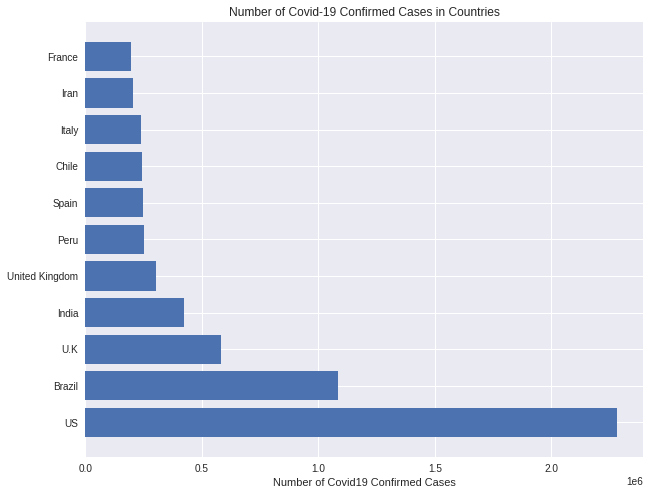

In [ ]:
plt.figure(figsize=(10, 8))
unique_countries[2]="U.K"
plt.barh(unique_countries[:11], country_confirmed_cases[:11])
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()

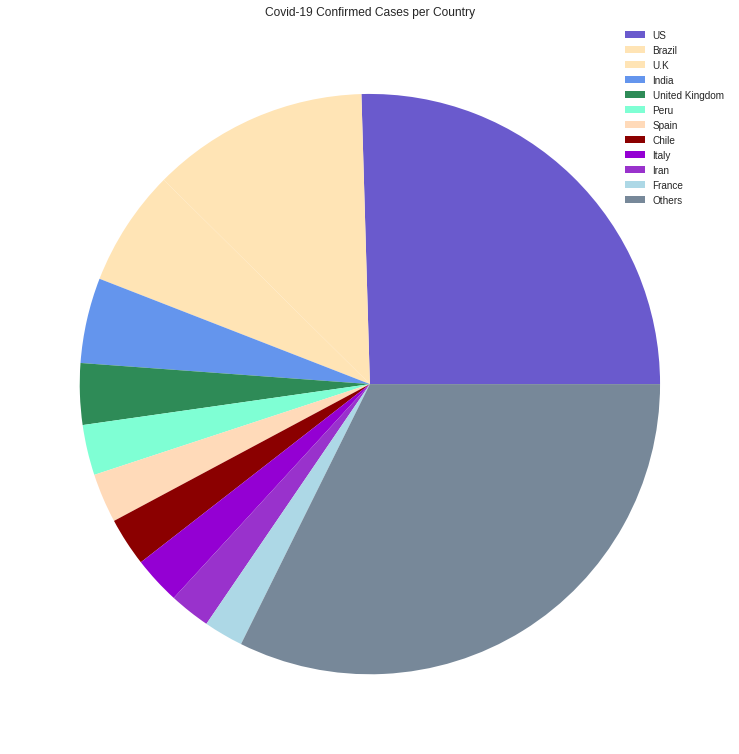

In [ ]:
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[11:])
for i in range(len(country_confirmed_cases[:11])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)


c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(13,15))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

In [ ]:
current_data = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv')
current_data_array = np.array(current_data)

locations = np.array(current_data['location'])
country_list = list(dict.fromkeys(locations))
print("Number of countries : ",len(country_list))
print(country_list)
#current_data_array

Number of countries :  207
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia', 'Ge

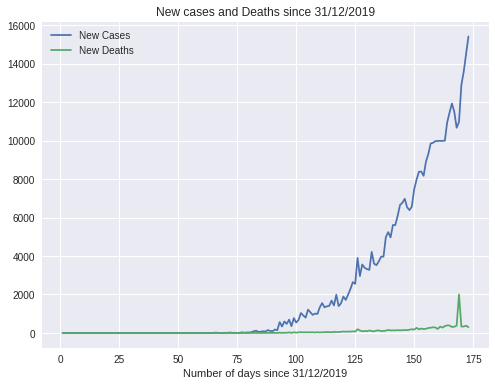

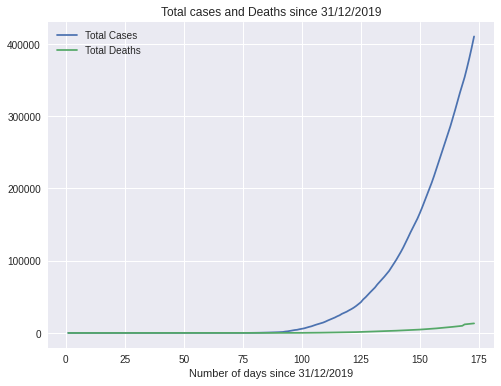

In [ ]:
#India analysis
country_ind = country_list.index('India') 
new_ind = current_data_array[:,1] == country_list[country_ind]

new_cases = current_data_array[new_ind,2]
new_deaths = current_data_array[new_ind,3]
total_cases = current_data_array[new_ind,4]
total_deaths = current_data_array[new_ind,5]

dates = np.linspace(1, len(new_cases), len(new_cases))
# dates = current_data_array[new_ind,0] For countries where updates do not occur daily. 

# Finally, we'll start by visualizing the data from our country of choice. 
plt.figure(figsize=(8, 6))
plt.plot(dates, new_cases, dates, new_deaths)
plt.title('New cases and Deaths since 31/12/2019')
plt.xlabel('Number of days since 31/12/2019')
plt.legend(['New Cases', 'New Deaths'])

print('\n\n')
plt.figure(figsize=(8, 6))
plt.title('Total cases and Deaths since 31/12/2019')
plt.xlabel('Number of days since 31/12/2019')
plt.plot(dates, total_cases, dates, total_deaths)
plt.legend(['Total Cases', 'Total Deaths'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning:

divide by zero encountered in log



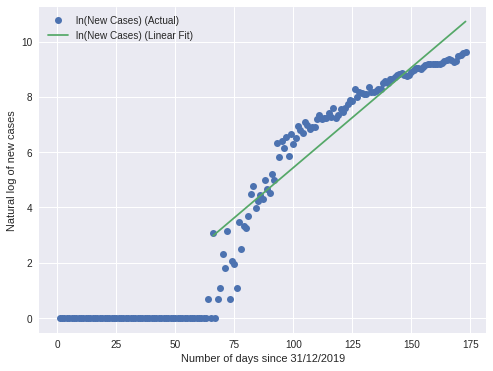

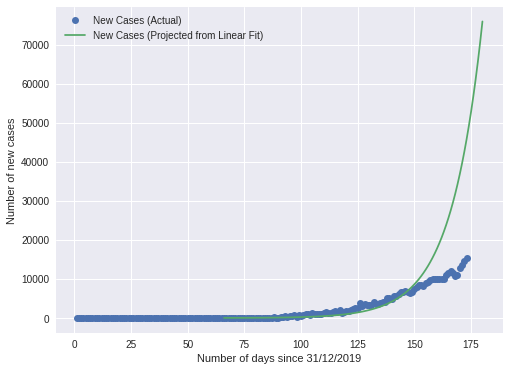

In [ ]:

import sklearn
from sklearn.linear_model import LinearRegression

dates = np.linspace(1, len(new_cases), len(new_cases)) 
dates = dates[:,np.newaxis] #dates from the US cases 

log_cases = np.log(np.array(new_cases, dtype=np.float64)) # Taking the natural log of the number of new cases in order to create a linear plot. 
infs = np.isinf(log_cases) # Setting places where the number of cases was 0 equal to 0 on the log scale - natural log of zero is negative infinity, which won't work with our plots.
log_cases[infs] = 0

model =  LinearRegression().fit(dates[65:],log_cases[65:]) # Performing a linear regression on the section of the data with new reported cases (Days 60+) 
pred = model.predict(dates) # Predicting the natural log of the number of cases based on the known dates.

dates_into_future = np.linspace(1, 180, 180) # Now, we want to look at future dates
fut_pred = model.predict(dates_into_future[65:, np.newaxis]) # Making predictions in future dates

plt.figure(figsize=(8, 6)) # Here, we're plotting the natural log of the new cases and the linear model that we've fit to that data. 
plt.plot(dates,  log_cases, 'o', dates[65:], pred[65:])
plt.ylabel("Natural log of new cases")
plt.xlabel("Number of days since 31/12/2019")
plt.legend(['ln(New Cases) (Actual)', 'ln(New Cases) (Linear Fit)'])
plt.show()

plt.figure(figsize=(8, 6)) # Here, we're plotting the actual data and the projection of the next 10 days (Days 135-150) from the linear fit that we made before. 
plt.plot(dates,  new_cases, 'o', dates_into_future[65:], np.exp(fut_pred))
plt.xlabel("Number of days since 31/12/2019")
plt.ylabel("Number of new cases")
plt.legend(['New Cases (Actual)', 'New Cases (Projected from Linear Fit)'])
plt.show()

In [ ]:
#SVM prediction

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[15:], india_cases[15:], test_size=0.20, shuffle=False)

kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]      # Error tube width e
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=4, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

svm_pred


array([-1.75500299e+03, -1.75497512e+03, -1.75478006e+03, -1.75425062e+03,
       -1.75321961e+03, -1.75151983e+03, -1.74898409e+03, -1.74544520e+03,
       -1.74073597e+03, -1.73468921e+03, -1.72713772e+03, -1.71791432e+03,
       -1.70685181e+03, -1.69378300e+03, -1.67854070e+03, -1.66095772e+03,
       -1.64086686e+03, -1.61810094e+03, -1.59249276e+03, -1.56387513e+03,
       -1.53208087e+03, -1.49694277e+03, -1.45829364e+03, -1.41596631e+03,
       -1.36979356e+03, -1.31960822e+03, -1.26524309e+03, -1.20653097e+03,
       -1.14330470e+03, -1.07539704e+03, -1.00264083e+03, -9.24868874e+02,
       -8.41913985e+02, -7.53608968e+02, -6.59786614e+02, -5.60279749e+02,
       -4.54921184e+02, -3.43543728e+02, -2.25980154e+02, -1.02063340e+02,
        2.83739600e+01,  1.65498944e+02,  3.09478767e+02,  4.60480625e+02,
        6.18671752e+02,  7.84219274e+02,  9.57290422e+02,  1.13805239e+03,
        1.32667241e+03,  1.52331758e+03,  1.72815513e+03,  1.94135224e+03,
        2.16307617e+03,  

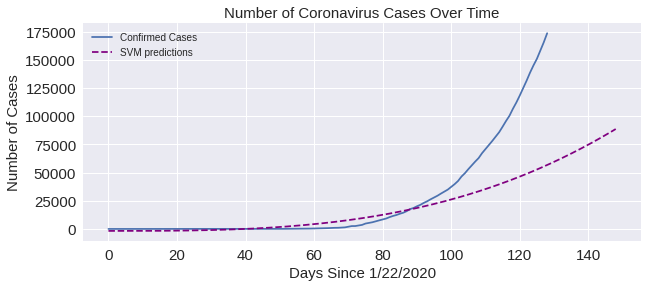

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(adjusted_dates, india_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('Number of Cases', size=15)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [ ]:
 pip install plotly 

In [ ]:
confirmed_df[confirmed_df['Country/Region']=="India"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
131,NaN,India,21.0,78.0,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,78055,81997,85784,90648,95698,100328,106475,112028,118226,124794,131423,138536,144950,150793,158086,165386,173491,181827,190609,198370,207191,216824,226713,236184,246622,257486,265928,276146,286605,297535,308993,320922,332424,343091,354065,366946,380532,395048,410451,425282


In [ ]:
confirmed_df = confirmed_df.replace(np.nan,'',regex=True)
death_df = death_df.replace(np.nan,'',regex=True)
recovery_df = recovery_df.replace(np.nan,'',regex=True)
country_df = country_df.replace(np.nan,'',regex=True)

In [ ]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/12/20', '6/13/20', '6/14/20', '6/15/20', '6/16/20', '6/17/20',
       '6/18/20', '6/19/20', '6/20/20', '6/21/20'],
      dtype='object', length=156)

In [ ]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

In [ ]:
START_DATE={
    'India':'1/30/20'
}
class Learner(object):
    def __init__(self,country,loss,start_date='1/22/20',predict_range=220,s_0=60000000,i_0=2,r_0=1.13):
        self.country= country
        self.loss = loss
        self.start_date=start_date
        self.predict_range=predict_range
        self.s_0=s_0
        self.i_0=i_0
        self.r_0=r_0
    
    def load_confirmed(self,country):
        df=pd.read_csv(confirmed_cases_file_link)
        df=df.drop(['Province/State'],axis=1)
        country_df = df[df['Country/Region']==country]
        return country_df.iloc[0].loc[self.start_date:]
    
    def load_recovered(self,country):
        df=pd.read_csv(recovery_case_file_link)
        df=df.drop(['Province/State'],axis=1)
        country_df = df[df['Country/Region']==country]
        return country_df.iloc[0].loc[self.start_date:]
    
    def load_dead(self,country):
        df=pd.read_csv(death_cases_file_link)
        df=df.drop(['Province/State'],axis=1)
        country_df = df[df['Country/Region']==country]
        return country_df.iloc[0].loc[self.start_date:]
    
    def extend_index(self,index,new_size):
        values = index.values
        current = datetime.strptime(index[-1],'%m/%d/%y')
        while len(values)<new_size:
            current = current+timedelta(days=1)
            values = np.append(values,datetime.strftime(current,'%m/%d/%y'))
        return values
    
    def predict(self,beta,gamma,data,recovered,death,country,s_0,i_0,r_0):
        new_index = self.extend_index(data.index,self.predict_range)
        size=len(new_index)
        def SIR(t,y):
            S= y[0]
            I= y[1]
            R= y[2]
            return [-beta*S*I,beta*S*I-gamma*I,gamma*I]
        extended_actual=np.concatenate((data.values,[None]*(size-len(data.values))))
        extended_recovered=np.concatenate((recovered.values,[None]*(size-len(recovered.values))))
        extended_death=np.concatenate((death.values,[None]*(size-len(death.values))))
        return new_index,extended_actual,extended_recovered,extended_death,solve_ivp(SIR,[0,size],[s_0,i_0,r_0], t_eval=np.arange(0, size, 1))
    
    def train(self):
        recovered =self.load_recovered(self.country)
        death = self.load_dead(self.country)
        data = (self.load_confirmed(self.country)-recovered-death)
        
        optimal=minimize(
        loss,
        [0.001,0.001],
        args=(data,recovered,self.s_0,self.i_0,self.r_0),
        method='L-BFGS-B',
        bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
        )
        print(optimal)
        beta, gamma = optimal.x
        new_index, extended_actual,extended_recovered,extended_death,prediction = self.predict(beta, gamma, data,recovered,death,self.country,self.s_0,self.i_0,self.r_0)
        df = pd.DataFrame({'Infected_data': extended_actual,'Recovered_data': extended_recovered,'Death_data': extended_death,'Susceptible': prediction.y[0],'Infected': prediction.y[1],'Recovered': prediction.y[2]}, index=new_index)
        df.to_csv(f"(self.country).csv")
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.set_title(self.country)
        df.plot(ax=ax)
        print(f'country=(self.country),beta={beta:.8f},gamma={gamma:.8f},r_0={(beta/gamma):.8f}')
        fig.savefig(f"{self.country}.png")
        return df,fig

In [ ]:
def loss(point, data,recovered,s_0,i_0,r_0):
    """
    RMSE between actual confirmed cases and the estimated infectious people with given beta and gamma.
    """
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1=np.sqrt(np.mean((solution.y[1] - data)**2))
    l2=np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha*l1+ (1-alpha)*l2
 

In [ ]:
india_learner = Learner(country='India',loss=loss,i_0=3)

      fun: 5397551.468442985
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.21603741e+13, 4.93600965e+01])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 42
      nit: 6
   status: 0
  success: True
        x: array([1.00000000e-08, 1.39677291e-05])
country=(self.country),beta=0.00000001,gamma=0.00001397,r_0=0.00071594


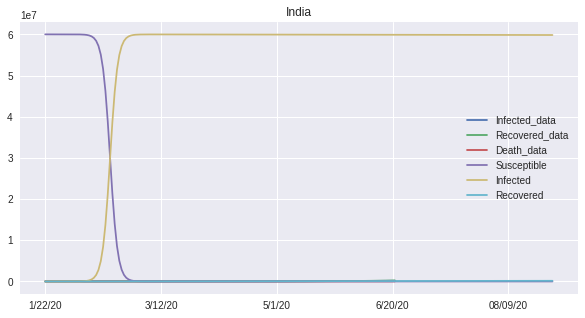

In [ ]:
india_df,india_fig = india_learner.train()

In [ ]:

def plot_sir_prediction(title,df_sir,remove_series=[],yaxis_type='',yaxis_title=''):
    fig=go.Figure()
    title = title
    labels=['Infected_data','Recovered_data','Death_data','Susceptible','Infected','Recovered']
    colors=[color_arr[0],color_arr[8],color_arr[2],color_arr[3],color_arr[7],color_arr[16]]
    line_size=[2,2,2,2,2,2]
    
    for index,data_series in enumerate(labels):
        if data_series not in remove_series:
            fig.add_trace(go.Scatter(x=df_sir.index,
                                    y=df_sir[data_series],
                                    name=labels[index],
                                    line=dict(
                                        color=colors[index],
                                        width=line_size[index]),
                                    connectgaps=True,))
        
    xaxis=dict(
    title='Date',
    showline=True,
    showgrid=True,
    showticklabels=True,
    linecolor='rgb(204,204,204)',
    linewidth =2,
    ticks='outside',
    tickangle=280,
    tickfont=dict(
        family='Arial',
        size=12,
        color='rgb(82,82,82)',),)
    
    yaxis=dict(
    title='Case Count',
    showline=True,
    showgrid=True,
    showticklabels=True,
    linecolor='rgb(204,204,204)',
    linewidth =2,)
    
    if yaxis_type!="":
        yaxis['type']=yaxis_type
        
    if yaxis_title!="":
        yaxis['title']=yaxis_title
    
    fig.update_layout(
    xaxis=xaxis,
    yaxis=yaxis,
    autosize=True,
    margin=dict(autoexpand=True,l=100,r=20,t=110,),
    showlegend=True)
    
    annotations = []
    
    annotations.append(dict(xref='paper',yref='paper',x=0.0,y=1.05,
                           xanchor='left',yanchor='bottom',
                           text=title,
                           font=dict(family='Arial',
                                    size=16,
                                    color='rgb(37,37,37)'),
                           showarrow=False))
    fig.update_layout(annotations=annotations)
    return fig
    

fig_8= plot_sir_prediction(title='SIR Model == Covid-19 Transmission == Prediction == India',df_sir=india_df)
fig_8.show()

In [ ]:
fig_8 = plot_sir_prediction(
    title='SIR Model == Covid-19 Transmission == Prediction == INDIA',
    df_sir= india_df,
    remove_series=['Susceptible'])
fig_8.show()

In [ ]:
fig_9 = plot_sir_prediction(
    title='SIR Model == Covid-19 Transmission == Prediction == INDIA',
    df_sir = india_df,
    remove_series=['Susceptible'],
    yaxis_type='log',
    yaxis_title='Case Count (Log Scale)')
fig_9.show()

In [ ]:
#Stay Safe